In [20]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, fftshift
import skimage
import scipy

In [2]:
font = {
    "fontname": "fbb",
}

def show_gray(ax, img, title="", **kwargs):
    ax.imshow(img, cmap="gray", interpolation="nearest", **kwargs)
    ax.axis("off")
    ax.set_title(title, fontdict=font)

In [30]:
lwir_path = "../../data/misc/extracted/thermal/flir_20191114T122220.jpg"
rgb_path = "../../data/misc/extracted/visible/flir_20191114T122220.jpg"

lwir = skimage.io.imread(lwir_path) / 255
gray = np.mean(skimage.io.imread(rgb_path), -1) / 255

gray_low = cv2.resize(gray, (lwir.shape[1], lwir.shape[0]))

x, y = gray_low.shape
fac = 0.09
gray_low = gray_low[int(x*fac):int(x*(1-fac)), int(y*fac):int(y*(1-fac))]
gray_low = cv2.resize(gray_low, (y, x))

## Fourier transform

In [31]:
gray.max()

1.0

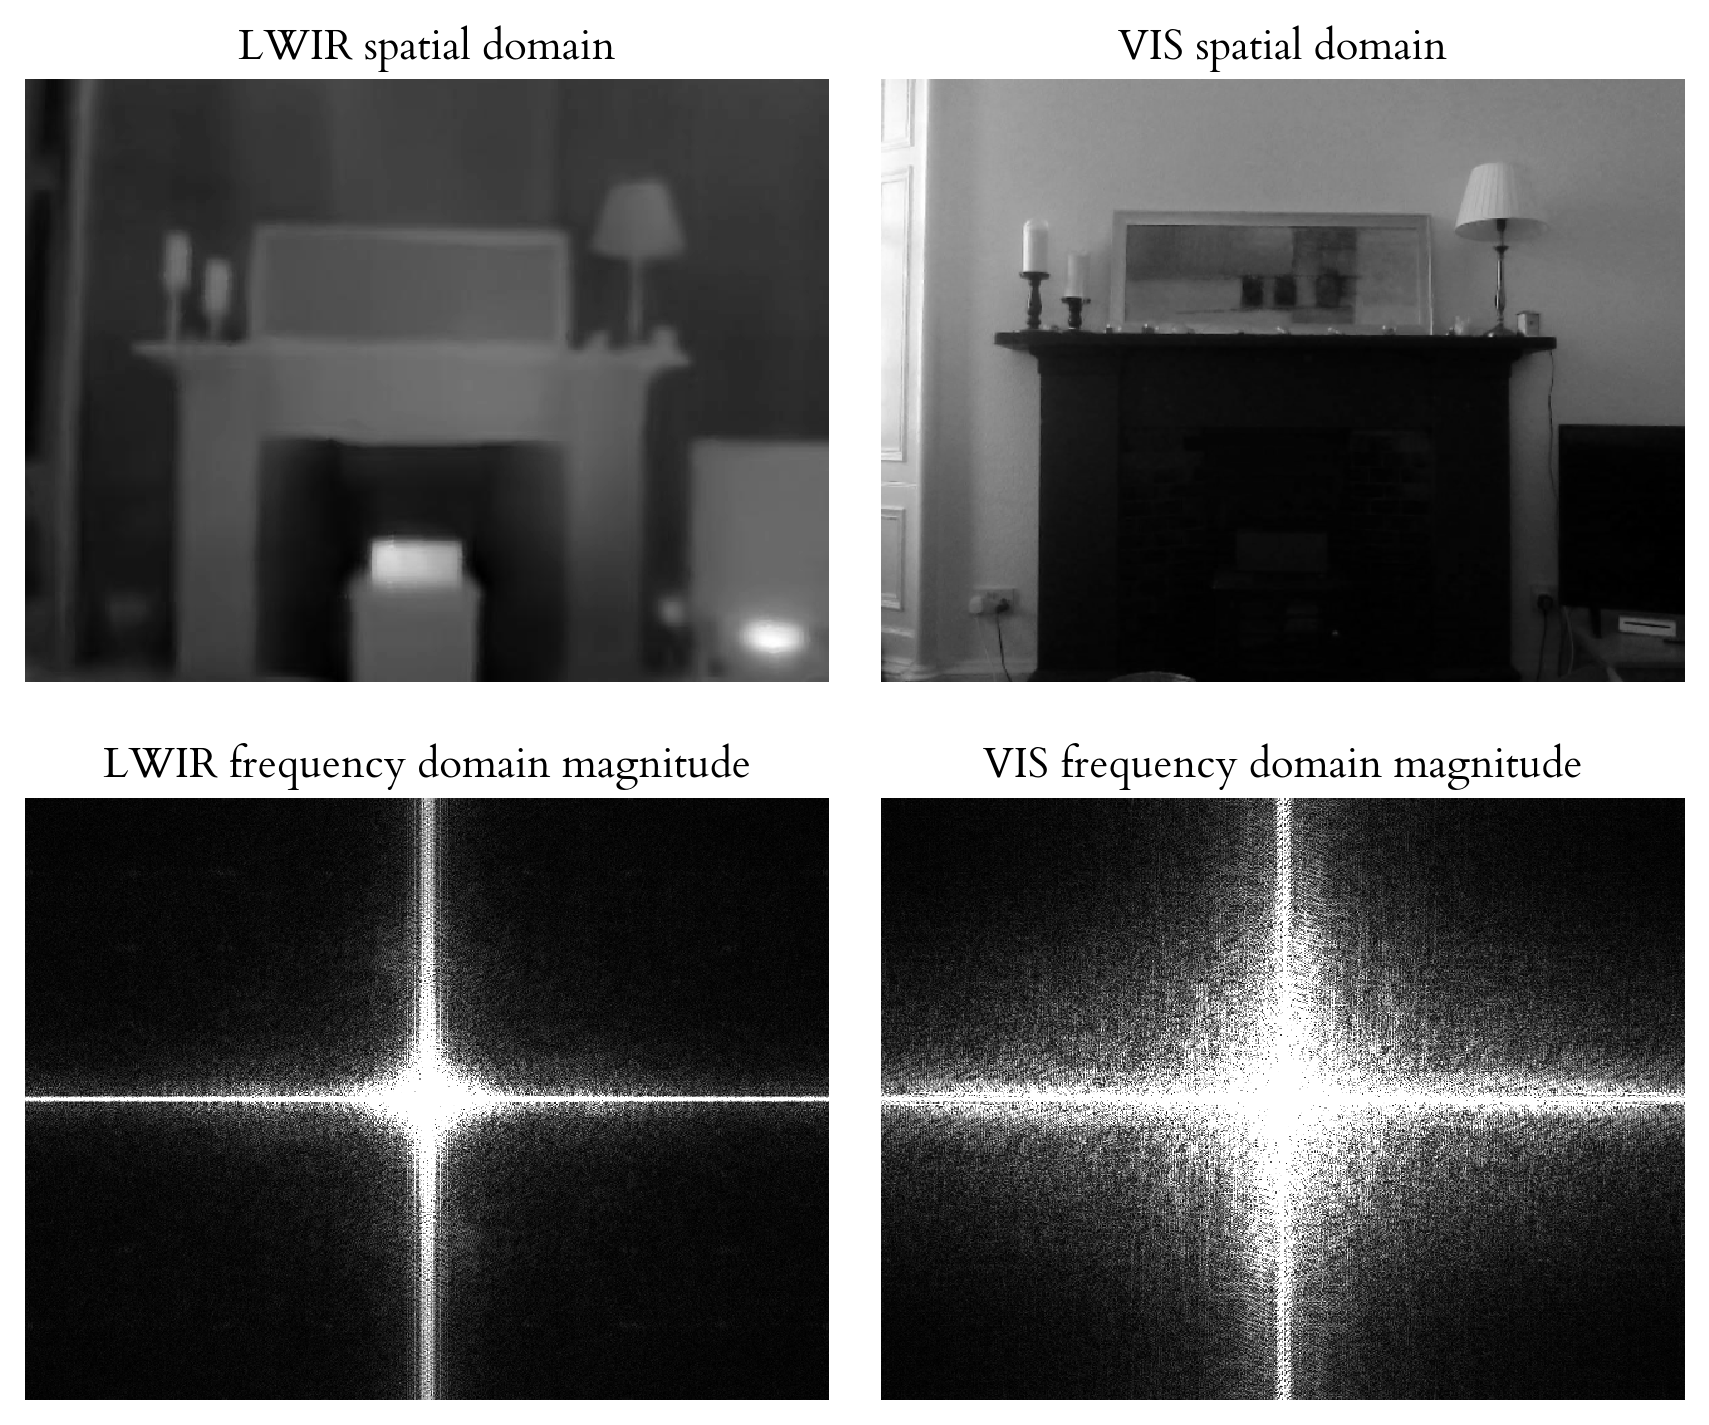

In [32]:
lwir_fourier = np.abs(fftshift(fft2(lwir)))
gray_fourier = np.abs(fftshift(fft2(gray_low)))

vmax = 15

fig, ax = plt.subplots(2, 2, figsize=(7, 6), dpi=250)

show_gray(ax[0][0], lwir, "LWIR spatial domain")
show_gray(ax[0][1], gray_low, "VIS spatial domain")

show_gray(ax[1][0], lwir_fourier, "LWIR frequency domain magnitude", vmin=0, vmax=vmax)
show_gray(ax[1][1], gray_fourier, "VIS frequency domain magnitude", vmin=0, vmax=vmax)

fig.tight_layout()

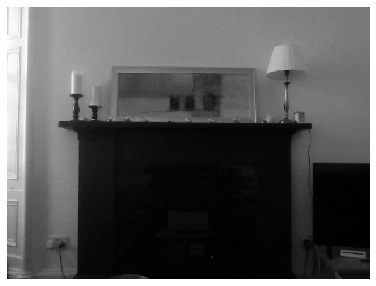

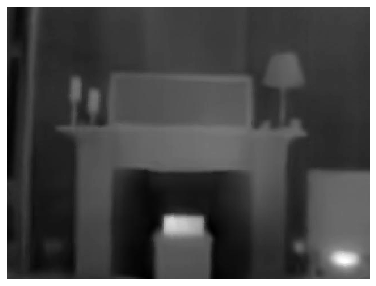

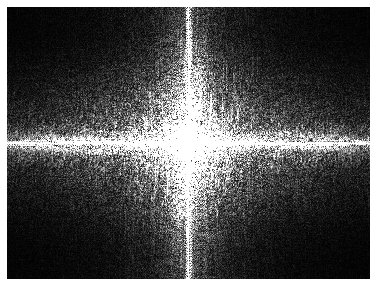

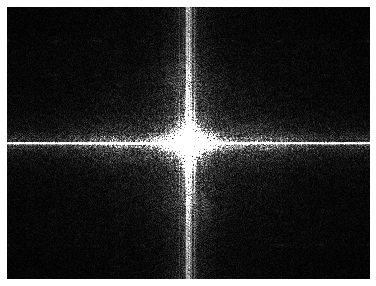

In [19]:
plt.figure(figsize=(8, 5))
plt.imshow(gray_low, cmap="gray", interpolation="nearest")
plt.axis("off")

plt.figure(figsize=(8, 5))
plt.imshow(lwir, cmap="gray", interpolation="nearest")
plt.axis("off")

plt.figure(figsize=(8, 5))
plt.imshow(gray_fourier, cmap="gray", interpolation="nearest", vmin=0, vmax=vmax)
plt.axis("off")

plt.figure(figsize=(8, 5))
plt.imshow(lwir_fourier, cmap="gray", interpolation="nearest", vmin=0, vmax=vmax)
plt.axis("off")

pass

## Image mean and std

In [306]:
lwir_path = "/Users/lindronics/workspace/4th_year/honours_project_data/main/animals_train_final/images/alpaca/alpaca_single_1/lwir"
rgb_path = "/Users/lindronics/workspace/4th_year/honours_project_data/main/animals_train_final/images/alpaca/alpaca_single_1/rgb"

stats = {
    "lwir": {
        "mean": [],
        "std": [],
    },
    "rgb": {
        "mean": [],
        "std": [],
    }
}
for path in os.listdir(lwir_path):
    img = skimage.io.imread(os.path.join(lwir_path, path)) / 255
    stats["lwir"]["mean"].append(np.mean(img))
    stats["lwir"]["std"].append(np.std(img))
    
for path in os.listdir(rgb_path):
    img = skimage.io.imread(os.path.join(rgb_path, path)) / 255
    stats["rgb"]["mean"].append(np.mean(img))
    stats["rgb"]["std"].append(np.std(img))

In [307]:
print(f"LWIR\t mean: {np.mean(stats['lwir']['mean']):.2f},\t std: {np.mean(stats['lwir']['std']):.2f}")
print(f"RGB\t mean: {np.mean(stats['rgb']['mean']):.2f},\t std: {np.mean(stats['rgb']['std']):.2f}")

LWIR	 mean: 0.48,	 std: 0.35
RGB	 mean: 0.60,	 std: 0.31


## Histogram

In [320]:
lwir_path = "../../data/misc/extracted/thermal/flir_20191114T122220.jpg"
rgb_path = "../../data/misc/extracted/visible/flir_20191114T122220.jpg"

lwir = skimage.io.imread(lwir_path) / 255
gray = np.mean(skimage.io.imread(rgb_path), -1) / 255

gray_low = cv2.resize(gray, (lwir.shape[1], lwir.shape[0]))

x, y = gray.shape
fac = 0.09
gray = gray[int(x*fac):int(x*(1-fac)), int(y*fac):int(y*(1-fac))]
gray = cv2.resize(gray, (y, x))

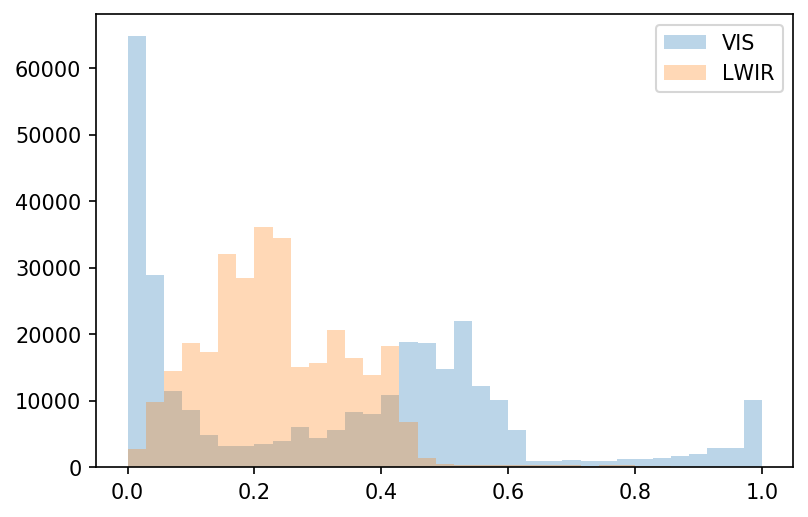

In [326]:
bins = 35

plt.figure(dpi=150)
plt.hist(gray_low.ravel(), bins=bins, alpha=0.3, label="VIS")
plt.hist(lwir.ravel(), bins=bins, alpha=0.3, label="LWIR")
plt.legend()
plt.show()

## Signal-to-noise ratio

In [22]:
lwir_path = "../../data/misc/extracted/thermal/flir_20191114T122220.jpg"
rgb_path = "../../data/misc/extracted/visible/flir_20191114T122220.jpg"

lwir = skimage.io.imread(lwir_path) / 255
gray = np.mean(skimage.io.imread(rgb_path), -1) / 255

scipy.stats.signaltonoise(lwir, axis=None)

AttributeError: module 'scipy.stats' has no attribute 'signaltonoise'

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'd